In [77]:
#imports
import torch
import torch.nn as nn
import numpy as np

In [78]:
weight = 0.3
bias = 0.9

#generate the dunny data
start = 0
end = 1
step = 0.01

X = torch.arange(start, end, step).unsqueeze(dim=1)
Y = weight * X + bias

print(X,Y)
print(X.shape, Y.shape)

tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900],
        [0.1000],
        [0.1100],
        [0.1200],
        [0.1300],
        [0.1400],
        [0.1500],
        [0.1600],
        [0.1700],
        [0.1800],
        [0.1900],
        [0.2000],
        [0.2100],
        [0.2200],
        [0.2300],
        [0.2400],
        [0.2500],
        [0.2600],
        [0.2700],
        [0.2800],
        [0.2900],
        [0.3000],
        [0.3100],
        [0.3200],
        [0.3300],
        [0.3400],
        [0.3500],
        [0.3600],
        [0.3700],
        [0.3800],
        [0.3900],
        [0.4000],
        [0.4100],
        [0.4200],
        [0.4300],
        [0.4400],
        [0.4500],
        [0.4600],
        [0.4700],
        [0.4800],
        [0.4900],
        [0.5000],
        [0.5100],
        [0.5200],
        [0.5300],
        [0.5400],
        [0

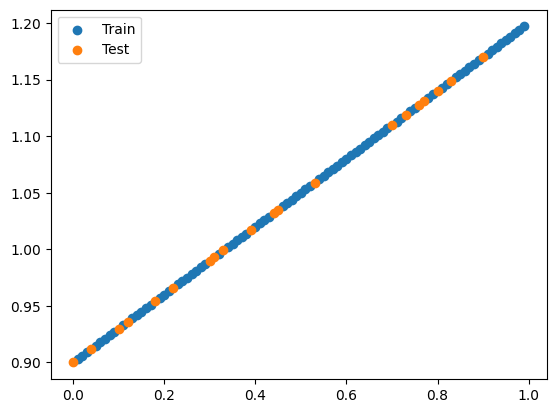

In [79]:
#split into train and test data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#plot the data to see the distribution
import matplotlib.pyplot as plt

plt.scatter(X_train, Y_train, label='Train')
plt.scatter(X_test, Y_test, label='Test')
plt.legend()
plt.show()


In [80]:
class LinearRegression_3(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x):
        return self.linear_layer(x)

In [81]:
model_2 = LinearRegression_3()
print(model_2.state_dict())

OrderedDict({'linear_layer.weight': tensor([[-0.0971]]), 'linear_layer.bias': tensor([-0.3982])})


In [82]:
_lr = 0.001
loss_function = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=_lr)



epochs = 5000
#define the data arrays
epoch_number = []
losses = []
test_losses = []

for epoch in range(epochs):
  model_2.train()
  Y_pred = model_2(X_train)
  loss = loss_function(Y_pred, Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing

  model_2.eval()
  with torch.inference_mode():
    Y_pred_test = model_2(X_test)
    test_loss = loss_function(Y_pred_test, Y_test)

  #append the data to the arrays
  epoch_number.append(epoch)
  losses.append(loss.item())
  test_losses.append(test_loss.item())

  if epoch % 100 == 0:
    print(f'Epoch {epoch} Train Loss: {loss.item()} Test Loss: {test_loss.item()}')


  # break the loop if the loss doesn't improve
  if epoch > 3 and test_losses[-1] >= test_losses[-2] and test_losses[-2] >= test_losses[-3]:
    print(f'Epoch {epoch} Train Loss: {loss.item()} Test Loss: {test_loss.item()}')
    break

Epoch 0 Train Loss: 1.4996992349624634 Test Loss: 1.4736535549163818
Epoch 100 Train Loss: 1.373944878578186 Test Loss: 1.3510710000991821
Epoch 200 Train Loss: 1.2481896877288818 Test Loss: 1.2284877300262451
Epoch 300 Train Loss: 1.1224339008331299 Test Loss: 1.1059038639068604
Epoch 400 Train Loss: 0.9966780543327332 Test Loss: 0.983319878578186
Epoch 500 Train Loss: 0.8709220886230469 Test Loss: 0.8607358932495117
Epoch 600 Train Loss: 0.7451661825180054 Test Loss: 0.7381518483161926
Epoch 700 Train Loss: 0.6194109320640564 Test Loss: 0.6155685186386108
Epoch 800 Train Loss: 0.4936564564704895 Test Loss: 0.49298587441444397
Epoch 900 Train Loss: 0.36790189146995544 Test Loss: 0.3704032599925995
Epoch 1000 Train Loss: 0.24214737117290497 Test Loss: 0.24782061576843262
Epoch 1100 Train Loss: 0.1163928285241127 Test Loss: 0.12523797154426575
Epoch 1200 Train Loss: 0.05213860422372818 Test Loss: 0.057425737380981445
Epoch 1300 Train Loss: 0.04432065784931183 Test Loss: 0.04901355132460

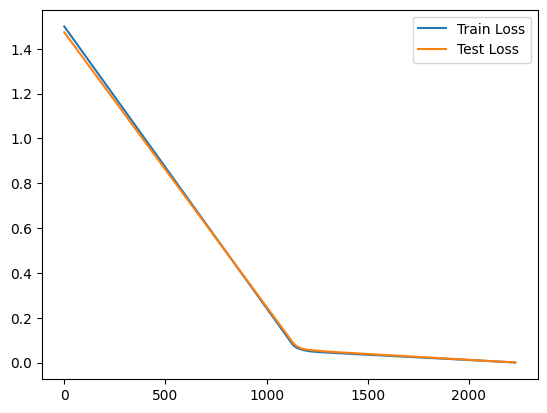

In [83]:
#plot the loss
plt.plot(epoch_number, losses, label='Train Loss')
plt.plot(epoch_number, test_losses, label='Test Loss')
plt.legend()
plt.show()

In [ ]:
#save the model
torch.save(model_2.state_dict(), 'model_2.pt')


In [ ]:
#load the model
model_2 = LinearRegression_3()
model_2.load_state_dict(torch.load('model_2.pt'))

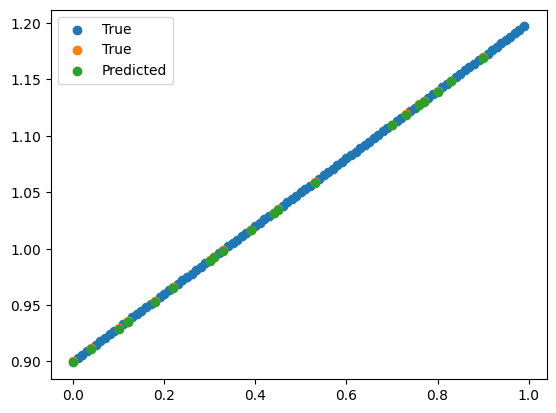

In [85]:
#predict
model_2.eval()
with torch.inference_mode():
  Y_pred = model_2(X_test)

plt.scatter(X_train, Y_train, label='True')
plt.scatter(X_test, Y_test, label='True')
plt.scatter(X_test, Y_pred.detach().numpy(), label='Predicted')
plt.legend()
plt.show()

In [87]:
variancy = 0
for point in zip(X_test, Y_test, Y_pred):
  variancy += (point[1] - point[2]) ** 2

print(variancy / len(Y_test))

tensor([5.7997e-07])
